In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns


# Import and Clean Data

In [3]:
#preload some datasets
df_all = pd.DataFrame.from_csv('nutritions.csv', index_col=None)
df_all = df_all.dropna()
df = df_all
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,8001,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,8002,800,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,8003,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,8005,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,8010,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0
5,8011,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH wit...",Breakfast Cereals,4.45,4.83,85.90,2.32,397.0,2.50,44.20,2.6,11.0,19.88,725.0
6,8012,800,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH'S P...",Breakfast Cereals,7.10,9.23,78.65,2.52,417.0,2.50,33.36,2.7,9.0,18.36,742.0
7,8013,800,"Cereals ready-to-eat, GENERAL MILLS, CHEERIOS",Breakfast Cereals,12.09,6.73,73.23,2.81,371.0,5.13,4.36,9.4,401.0,33.17,576.0
8,8014,800,"Cereals ready-to-eat, KELLOGG, KELLOGG'S COCOA...",Breakfast Cereals,5.22,2.90,86.05,3.02,389.0,2.81,38.50,1.9,130.0,14.70,424.0
9,8015,800,"Cereals ready-to-eat, POST, COCOA PEBBLES",Breakfast Cereals,4.70,4.20,85.80,2.80,397.0,2.50,34.50,1.5,21.0,6.00,586.0


In [6]:
df['Group'].value_counts()

Beef Products        719
Breakfast Cereals    332
Sweets               278
Fast Foods           242
Beverages            197
Snacks               111
Name: Group, dtype: int64

In [8]:
df[df['Group']=='Sweets']

,FoodID,GroupID,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
1000,19013,1900,"Snacks, fruit leather, pieces",Sweets,1.00,2.68,82.82,1.20,359.0,12.30,57.58,0.0,18.0,0.75,403.0
1001,19014,1900,"Snacks, fruit leather, rolls",Sweets,0.10,3.00,85.80,0.90,371.0,10.20,49.16,0.0,32.0,1.01,317.0
1040,19064,1900,"Candies, TOOTSIE ROLL, chocolate-flavor roll",Sweets,1.59,3.31,87.73,0.68,387.0,6.69,56.32,0.1,36.0,0.80,44.0
1041,19065,1900,"Candies, ALMOND JOY Candy Bar",Sweets,4.13,26.93,59.51,1.23,479.0,8.20,48.34,5.0,64.0,1.27,142.0
1043,19068,1900,"Candies, NESTLE, BIT-O'-HONEY Candy Chews",Sweets,2.00,7.50,80.00,1.31,375.0,8.30,48.00,0.2,35.0,0.20,295.0
1044,19069,1900,"Candies, NESTLE, BUTTERFINGER Bar",Sweets,5.40,18.90,72.90,1.57,459.0,1.23,45.90,2.0,36.0,0.79,230.0
1045,19070,1900,"Candies, butterscotch",Sweets,0.03,3.30,90.40,1.01,391.0,5.25,80.46,0.0,4.0,0.01,391.0
1046,19071,1900,"Candies, carob, unsweetened",Sweets,8.15,31.36,56.29,2.66,540.0,1.54,34.11,3.8,303.0,1.29,107.0
1047,19074,1900,"Candies, caramels",Sweets,4.60,8.10,77.00,1.80,382.0,8.50,65.50,0.0,138.0,0.14,245.0
1048,19075,1900,"Candies, CARAMELLO Candy Bar",Sweets,6.19,21.19,63.81,1.46,462.0,6.79,56.92,1.2,213.0,1.09,122.0


In [10]:
df.drop(['FoodID'],axis=1,inplace=True)

In [11]:
df.drop(['GroupID'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 0 to 2345
Data columns (total 13 columns):
Food            1879 non-null object
Group           1879 non-null object
Protein         1879 non-null float64
Fat             1879 non-null float64
Carbohydrate    1879 non-null float64
Ash             1879 non-null float64
Energy          1879 non-null float64
Water           1879 non-null float64
Sugars          1879 non-null float64
Fiber           1879 non-null float64
Calcium         1879 non-null float64
Iron            1879 non-null float64
Sodium          1879 non-null float64
dtypes: float64(11), object(2)
memory usage: 205.5+ KB


In [14]:
df['Food'].nunique()

1879

In [16]:
df['Food'].value_counts()

Wine, non-alcoholic                                                                                                                1
Clam and tomato juice, canned                                                                                                      1
Cereals, whole wheat hot natural cereal, cooked with water, with salt                                                              1
Beef, tenderloin, steak, separable lean and fat, trimmed to 1/8" fat, select, raw                                                  1
Beef, chuck eye roast, boneless, America's Beef Roast, separable lean only, trimmed to 0" fat, all grades, raw                     1
Beef, chuck, top blade, separable lean and fat, trimmed to 0" fat, select, cooked, broiled                                         1
BURGER KING, DOUBLE WHOPPER, with cheese                                                                                           1
Candies, REESE'S BITES                                               

In [17]:
df.head()

,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,"Cereals ready-to-eat, POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,"Cereals ready-to-eat, KELLOGG, KELLOGG'S APPLE...",Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,"Cereals ready-to-eat, KELLOGG, KELLOGG'S ALL-B...",Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,"Cereals ready-to-eat, QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0


In [36]:
df['Food']=df['Food'].astype('str')

In [20]:
df['Food']=df['Food'].str.replace('Cereals ready-to-eat','')

In [21]:
df.head()

,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,", KELLOGG, KELLOGG'S ALL-BRAN Original",Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,", POST, ALPHA-BITS",Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,", KELLOGG, KELLOGG'S APPLE JACKS",Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,", KELLOGG, KELLOGG'S ALL-BRAN BRAN BUDS",Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,", QUAKER, CAP'N CRUNCH",Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0


In [28]:
df['Food']=df['Food'].str.replace(',','')

In [29]:
df.head()

,Food,Group,Protein,Fat,Carbohydrate,Ash,Energy,Water,Sugars,Fiber,Calcium,Iron,Sodium
0,KELLOGG KELLOGG'S ALL-BRAN Original,Breakfast Cereals,13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0
1,POST ALPHA-BITS,Breakfast Cereals,8.10,3.80,83.70,3.20,385.0,1.20,35.50,5.7,29.0,6.40,634.0
2,KELLOGG KELLOGG'S APPLE JACKS,Breakfast Cereals,5.00,1.90,88.20,2.40,366.0,2.50,44.00,9.3,11.0,16.10,459.0
3,KELLOGG KELLOGG'S ALL-BRAN BRAN BUDS,Breakfast Cereals,7.00,2.15,80.00,7.90,250.0,3.00,27.00,43.0,63.0,15.00,676.0
4,QUAKER CAP'N CRUNCH,Breakfast Cereals,4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0


In [61]:
df['Food']=df['Food'].astype('object')

In [62]:
areas=['Protein','Fat','Carbohydrate','Ash','Energy','Water','Sugar','Fiber','Calcium','Iron','Sodium']
food=[13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0]

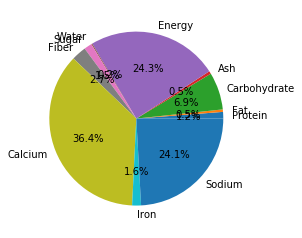

In [63]:
plt.pie(food,labels=areas,autopct="%0.1f%%")
plt.show()

In [22]:
def food(food1):
    if food1=="KELLOGG KELLOGG'S ALL-BRAN Original" :
        areas=['Protein','Fat','Carbohydrate','Ash','Energy','Water','Sugar','Fiber','Calcium','Iron','Sodium']
        food=[13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0]
        
        
        
        plt.figure(figsize=(10,12))
        plt.pie(food,labels=areas,autopct="%0.1f%%")
        plt.show()

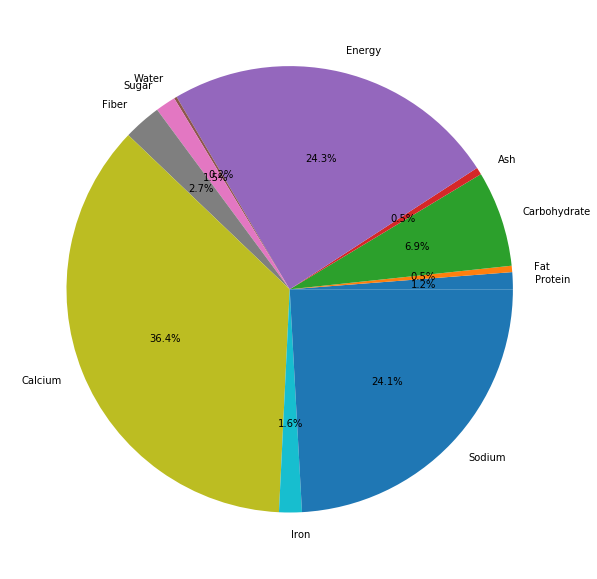

In [23]:
food("KELLOGG KELLOGG'S ALL-BRAN Original")

In [20]:
def foods(food1,food2):
    if food1=="KELLOGG KELLOGG'S ALL-BRAN Original" and food2=="QUAKER CAP'N CRUNCH":
        areas=['Protein','Fat','Carbohydrate','Ash','Energy','Water','Sugar','Fiber','Calcium','Iron','Sodium']
        food_1=[13.14,4.90,74.24,5.60,260.0,2.12,15.69,29.3,389.0,17.60,258.0]
        food_2=[4.39,5.12,85.51,2.48,398.0,2.50,44.32,2.5,11.0,19.42,754.0]
        food=np.add(food_1,food_2)
        
        
        plt.figure(figsize=(10,12))
        plt.pie(food,labels=areas,autopct="%0.1f%%")
        
        plt.show()
        
        
    

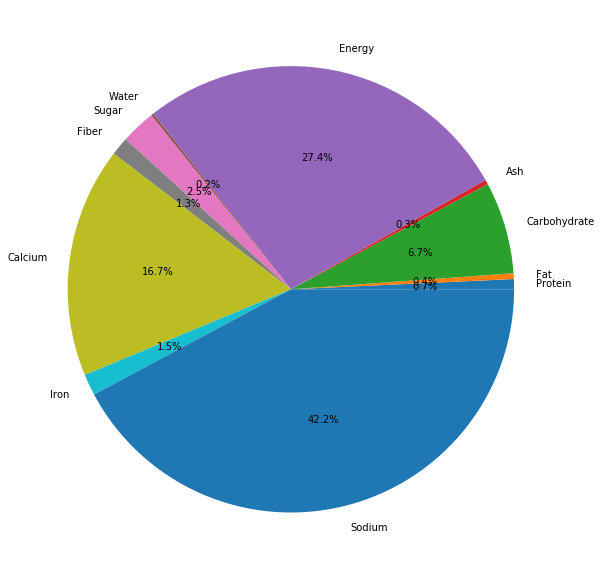

In [21]:
foods("KELLOGG KELLOGG'S ALL-BRAN Original","QUAKER CAP'N CRUNCH")